# Important Libraries For The Assignment


In [1]:
import cv2
import os
import glob
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from numpy import linalg as LA 


# A.The dataset has 10 images per 40 subjects. Every image is a grayscale image of  size 92x112.(10 Points) 
 


In [2]:
img_dir = "./ATT" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
i=0
for f1 in files:
    i=i+1
    img = cv2.imread(f1)
    dim=(92,112)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    data.append(gray)
    mydata = np.array(data)
d=np.reshape(mydata, (400, 10304))
print("Shape od D matrix :",d.shape)

Shape od D matrix : (400, 10304)


# Preparing the Labels Of the Data Stack the 400 vector into a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [3]:
nameOflabels = []
label=1
for i in range(1,401):

    labelX= str(label)
    nameOflabels.append(labelX)
    z=i%40
    if z<1:
         label = label +1       
df = pd.DataFrame(d, index=nameOflabels)
print("The Size of The Dataset :",df.shape)

The Size of The Dataset : (400, 10304)


In [4]:
print("Name Of labels\n",nameOflabels)

Name Of labels
 ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5'

In [5]:
len(nameOflabels)


400

### From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. This will give you 5 instances per person for training and 5 instances per person for testing

In [6]:
i_train=0
i_test=0
train_split_value = int(d.shape[0]*(5/10))
test_split_value = d.shape[0] - train_split_value
    
train_data = np.zeros((train_split_value,10304))
train_labels = np.zeros((train_split_value,1)) 
test_data = np.zeros((test_split_value,10304))
test_labels = np.zeros((test_split_value,1))
for i in range(d.shape[0]):
        #even
    if i%2==0:
       test_data[i_test,:] = d[i]
       test_labels[i_test] = nameOflabels[i]
       i_test+=1
        #odd
    
    else:
      train_data[i_train,:] = d[i]
      train_labels[i_train] = nameOflabels[i]
      i_train+=1

# PCA Implementation

In [7]:
#calculating the mean of train and test data
mean_train_data = np.mean(train_data, axis=0).reshape(10304,1)
mean_test_data = np.mean(test_data, axis=0).reshape(10304,1)
#Z=data -one.mean
z_Train = train_data - np.ones((200,1)).dot(mean_train_data.T)
z_Test = test_data - np.ones((200,1)).dot(mean_test_data.T)
#covariance matrix and Finding the Eign Values and Victors
covarianceMatrix_Training = (1/len(z_Train))*np.matmul(np.transpose(z_Train),z_Train)
covarianceMatrix_Testing = (1/len(z_Test))*np.matmul(np.transpose(z_Test),z_Test)
eigenValues_train_data,eigenVectors_train_data = LA.eigh(covarianceMatrix_Training)
eigenValues_test_data,eigenVectors_test_data = LA.eigh(covarianceMatrix_Testing)  
#step Sorting using the train data 
idx = eigenValues_train_data.argsort()[::-1]   
eigenValuesSorted = eigenValues_train_data[idx]
eigenVectorsSorted = eigenVectors_train_data[:,idx]

In [8]:
def findAlpha (a,alpha,EigenValuesSorted):
    for i in range(a,10304):

        B = float(sum(EigenValuesSorted))
        T = float(sum(EigenValuesSorted[:i]))
        if(T/B >= alpha):
            return i
        

In [11]:
def Knn(train_data,train_label,test_data,test_label,alpha,best_n):
      
    score = []
    for i,neighbour in zip(range(len(best_n )),best_n ):
        KnnTest = KNeighborsClassifier(n_neighbors = neighbour, weights = 'distance') 
        KnnTest.fit(train_data.T, train_label) 
        pred = KnnTest.predict(test_data.T)
        score.append(accuracy_score(pred,test_label)) 
        print(score)
        
    plt.plot(best_n,score)
    plt.ylabel('Accuracy')
    plt.xlabel('K')
    plt.show()
    
    
    plt.plot(score,alpha)
    plt.xlabel('Accuracy')
    plt.ylabel('ALpha')
    plt.show()
    

For Alpha: 0.8
For Alpha: 0.85
For Alpha: 0.9
For Alpha: 0.95
[0.95]
[0.95, 0.915]
[0.95, 0.915, 0.895]
[0.95, 0.915, 0.895, 0.875]


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


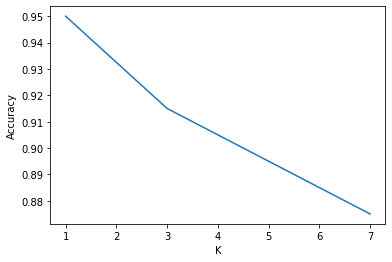

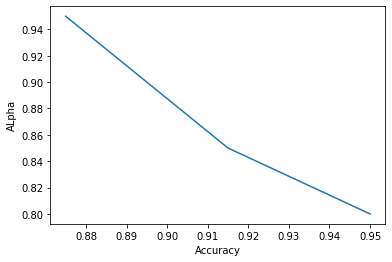

In [12]:
chosen_Alpha= [0.8,0.85,0.9,0.95]
best_n = [1,3,5,7]
for a in chosen_Alpha:
    W= findAlpha(0,a,eigenValuesSorted)
    NewW = eigenVectorsSorted[: , 0 : W + 1]
    wTrain = np.dot(NewW.T , z_Train.T)
    wTest = np.dot(NewW.T , z_Test.T)
    print("For Alpha: " + str(a))
    
    
Knn(wTrain,train_labels,wTest,test_labels,chosen_Alpha,best_n)   